In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

In this notebook, we inspect all features built up to now. These are global and group-level feats.

In [2]:
DAT_DIR = '/Users/gfg/data/venture=Zalora/sg/'
FIG_DIR = DAT_DIR + 'fig/'
ready_dir = DAT_DIR + 'clean/groups/ready/'
# CLEAN_DIR = DAT_DIR + 'clean/'
# GROUP_DIR = CLEAN_DIR + 'groups/' 
# FEAT_DIR = GROUP_DIR + 'feats/'

## Helpers

In [13]:
def dat_dist_by_year(df):
    df['year'] = df['snapshot_date'].apply(lambda d: d.year)

    print('# records in year 2016: {}'.format(sum(df.year == 2016)))
    print('# records in year 2017: {}'.format(sum(df.year == 2017)))
    return df

In [ ]:
def dat_dist(df): # n rows of a config in a year
    grouped = df.groupby(['sku_config', 'year'])

In [33]:
def corr_with_sale(feature, df):
    if feature in df.columns:
        return np.corrcoef(df[feature], df['n_sold'])[0, 1]
    else:
        return np.nan

# Correlation between features and sales

In [15]:
# feats and target only
static_feats = ['color_pop', 'brand_pop']
price_feats = ['current_price', 'percent_discount_from_rrp']
canib_feats = ['n_competitor', 'log10_rel_price', 'rel_price_as_ratio'] 
ga_feats = ['mean_views', 'mean_impressions', 'total_views', 'total_impressions']
feats = static_feats + price_feats + canib_feats + ga_feats
target = ['n_sold']

In [36]:
def cal_corrs(group_id):
    # for a given group, compute correlations bw features and sales
    
    # load data
    fname = ready_dir + group_id + '.csv'
    ready_df = pd.read_csv(fname, parse_dates=['date'])
    print('Info on ready data:')
    print(ready_df.info())

    # compute correlations
    avail_feats = [f for f in feats if f in ready_df.columns]
    df = ready_df[avail_feats + target]
    corrs = [corr_with_sale(f, df) for f in feats]
    cor_df = pd.DataFrame({'feature': feats, 'correlation_score': corrs})
    print('Correlation scores sorted:')
    return cor_df.sort_values('correlation_score', ascending=False)

## Female dresses

In [14]:
# brand popularity == total views
fem_dress[['brand_pop', 'total_views']]

,brand_pop,total_views
0,10424,10424
1,2715,2715
2,47,47
3,61,61
4,36,36
5,77,77
6,74,74
7,112,112
8,67,67
9,74,74


In [31]:
cal_corrs(group_id = 'dresses_female_autumn-winter_2017')

Info on ready data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16606 entries, 0 to 16605
Data columns (total 34 columns):
sku_config                          16606 non-null object
current_price                       16606 non-null float64
percent_discount_from_rrp           16606 non-null float64
n_competitor                        16606 non-null int64
rel_price_as_ratio                  16606 non-null float64
black_price                         16606 non-null float64
product_name                        16606 non-null object
color                               16606 non-null object
color_pop                           16606 non-null float64
sub_cat                             16606 non-null object
brand_name                          16606 non-null object
brand_type                          16606 non-null object
date                                16606 non-null datetime64[ns]
total_views                         16606 non-null int64
total_impressions                   16606 non-nu

,correlation_score,feature
7,0.192563,mean_views
8,0.176605,mean_impressions
1,0.138050,brand_pop
9,0.138050,total_views
10,0.136588,total_impressions
0,0.035140,color_pop
4,0.002046,n_competitor
5,-0.028888,log10_rel_price
3,-0.038448,percent_discount_from_rrp
2,-0.039855,current_price


## Fashion bags in spring-summer 2017

In [37]:
cal_corrs(group_id='fashion_bags_female_spring-summer_2017')

Info on ready data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 33 columns):
sku_config                          975 non-null object
current_price                       975 non-null float64
percent_discount_from_rrp           975 non-null float64
n_competitor                        975 non-null int64
rel_price_as_ratio                  975 non-null float64
product_name                        975 non-null object
color                               975 non-null object
color_pop                           975 non-null float64
sub_cat                             975 non-null object
brand_name                          975 non-null object
brand_type                          975 non-null object
date                                975 non-null datetime64[ns]
total_views                         975 non-null int64
total_impressions                   975 non-null int64
mean_views                          975 non-null float64
mean_impressions         

,correlation_score,feature
7,0.188215,mean_views
1,0.185196,brand_pop
9,0.185196,total_views
10,0.180887,total_impressions
8,0.179863,mean_impressions
3,0.175812,percent_discount_from_rrp
4,0.155970,n_competitor
0,0.147371,color_pop
5,-0.191157,log10_rel_price
2,-0.199506,current_price


## Male shirts in spring-summer 2017

In [38]:
cal_corrs(group_id='shirts_male_spring-summer_2017')

Info on ready data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3517 entries, 0 to 3516
Data columns (total 33 columns):
sku_config                          3517 non-null object
current_price                       3517 non-null float64
percent_discount_from_rrp           3517 non-null float64
n_competitor                        3517 non-null int64
rel_price_as_ratio                  3517 non-null float64
product_name                        3517 non-null object
color                               3517 non-null object
color_pop                           3517 non-null float64
sub_cat                             3517 non-null object
brand_name                          3517 non-null object
brand_type                          3517 non-null object
date                                3517 non-null datetime64[ns]
total_views                         3517 non-null int64
total_impressions                   3517 non-null int64
mean_views                          3517 non-null float64
mean_imp

,correlation_score,feature
7,0.235104,mean_views
8,0.228173,mean_impressions
3,0.115728,percent_discount_from_rrp
10,0.096668,total_impressions
1,0.096210,brand_pop
9,0.096210,total_views
0,0.073406,color_pop
2,0.001915,current_price
5,-0.010830,log10_rel_price
4,-0.069699,n_competitor


# Global features

In [3]:
glob_feat = pd.read_csv(CLEAN_DIR + 'global_feats.csv')
glob_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097778 entries, 0 to 1097777
Data columns (total 13 columns):
sku_config           1097778 non-null object
product_name         1097778 non-null object
color                1097778 non-null object
sub_cat              1097778 non-null object
brand_name           1097778 non-null object
n_sold               877996 non-null float64
color_pop            877996 non-null float64
brand_type           1058709 non-null object
date                 1058709 non-null object
brand_total_views    1058709 non-null float64
total_impressions    1058709 non-null float64
brand_mean_views     1058709 non-null float64
mean_impressions     1058709 non-null float64
dtypes: float64(6), object(7)
memory usage: 108.9+ MB


In [7]:
cols = ['sku_config', 'product_name', 'color', 'color_pop', 'sub_cat', 'brand_name']
glob_feat = glob_feat[cols].drop_duplicates()
print(glob_feat.shape)

(74613, 6)


In [6]:
yr = 2017
brand_pop = pd.read_csv(CLEAN_DIR + '{}_brand_pop.csv'.format(yr), parse_dates=['date'])
brand_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111233 entries, 0 to 111232
Data columns (total 7 columns):
brand_name           111233 non-null object
brand_type           111233 non-null object
date                 111233 non-null datetime64[ns]
total_views          111233 non-null int64
total_impressions    111233 non-null int64
mean_views           111233 non-null float64
mean_impressions     111233 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 5.9+ MB


In [10]:
glob_feat = pd.merge(glob_feat, brand_pop)
print(glob_feat.shape)

(14391695, 12)


In [11]:
glob_feat.head()

,sku_config,product_name,color,color_pop,sub_cat,brand_name,brand_type,date,total_views,total_impressions,mean_views,mean_impressions
0,CO302SH58WHLSG,Chuck Taylor All Star Canvas Ox Unisex Sneakers,black,14.330218,sneakers,Converse,regional_branded,2017-01-01,1189,32626,21.232143,582.607143
1,CO302SH58WHLSG,Chuck Taylor All Star Canvas Ox Unisex Sneakers,black,14.330218,sneakers,Converse,regional_branded,2017-01-02,1806,43205,32.250000,771.517857
2,CO302SH58WHLSG,Chuck Taylor All Star Canvas Ox Unisex Sneakers,black,14.330218,sneakers,Converse,regional_branded,2017-01-03,1301,34026,23.232143,607.607143
3,CO302SH58WHLSG,Chuck Taylor All Star Canvas Ox Unisex Sneakers,black,14.330218,sneakers,Converse,regional_branded,2017-01-04,1041,27482,18.589286,490.750000
4,CO302SH58WHLSG,Chuck Taylor All Star Canvas Ox Unisex Sneakers,black,14.330218,sneakers,Converse,regional_branded,2017-01-05,971,32698,17.339286,583.892857


In [12]:
glob_feat.to_csv(CLEAN_DIR + '{}_glob_feat.csv'.format(yr), index=False)

In [71]:
def show_top(df, k=5, attrib='color_pop'):
    return df.sort_values(attrib, ascending=False).head(k)

## Color popularity

In [ ]:
sum(glob_feat.color_pop.isnull())

Lots of NA pops. Which are colors with NA pops?

In [ ]:
glob_feat[glob_feat.color_pop.isnull()].color.unique()[:3]
# color_pop.query('color == "warm yellow"')

In [69]:
def get_color_pop(sc):
    cols = ['sub_cat', 'color', 'color_pop']
    df = glob_feat[cols].query('sub_cat == "{}"'.format(sc)).dropna()
    return df.drop_duplicates().query('color != "na"')

def color_pop_hist(df):
    pl.hist(df['color_pop'])
    a = pl.gca() # get current axes
    a.set_yscale('log')
    
    pl.xlabel('Popularity')
    pl.ylabel('# color')
    sc = df['sub_cat'].iloc[0]
    pl.title(sc)
    pl.grid(True, linestyle='--')

def diff_color_pop(df1, df2, fsize=(10, 5)): 
    fig = pl.subplots(1, 2, figsize=fsize)
    pl.subplot(121)
    color_pop_hist(df1)
    
    pl.subplot(122)
    color_pop_hist(df2)
    
    pl.suptitle('Histogram of color popularity (log-10 scale)')
    sc1, sc2 = df1.sub_cat.iloc[0], df2.sub_cat.iloc[0]
    pl.savefig(FIG_DIR + 'color_pop_{}_vs_{}.pdf'.format(sc1, sc2))
    pl.show(); pl.close()
    

### Jewellery vs Dresses

In [74]:
def comp_color_pop(sc1, sc2):
    df1 = get_color_pop(sc1)
    df2 = get_color_pop(sc2)
    diff_color_pop(df1, df2)

    top1, top2 = show_top(df1, attrib='color_pop'), show_top(df2, attrib='color_pop')
    return top1, top2

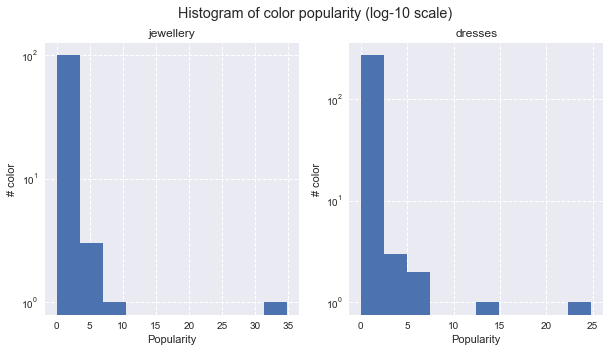

In [75]:
top1, top2 = comp_color_pop('jewellery', 'dresses')

In [80]:
top1.append(top2).reset_index(drop=True)

,index,sub_cat,color,color_pop
0,1316178,jewellery,silver,34.850560
1,2390843,jewellery,multi,8.262765
2,1211198,jewellery,black,4.489415
3,1317522,jewellery,gold,3.985056
4,1642587,jewellery,rose gold,3.835616
5,492461,dresses,black,24.872127
6,490845,dresses,blue,12.534664
7,489431,dresses,white,6.988353
8,492663,dresses,navy,6.772663
9,493067,dresses,red,4.258335


### Dresses vs Skirts

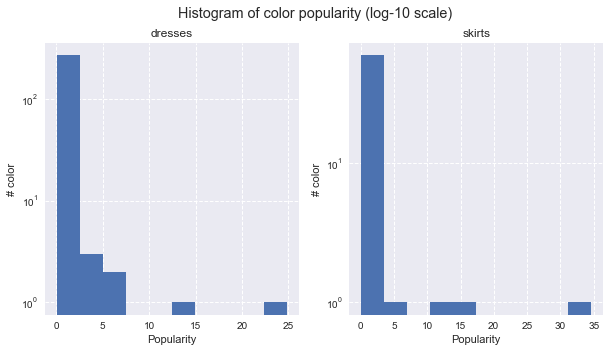

In [77]:
top3, top4 = comp_color_pop('dresses', 'skirts')

In [79]:
top3.append(top4).reset_index()

,index,sub_cat,color,color_pop
0,492461,dresses,black,24.872127
1,490845,dresses,blue,12.534664
2,489431,dresses,white,6.988353
3,492663,dresses,navy,6.772663
4,493067,dresses,red,4.258335
5,498723,skirts,black,34.660194
6,495491,skirts,grey,16.067961
7,494683,skirts,blue,12.378641
8,669609,skirts,navy,3.737864
9,498319,skirts,white,2.766990


## Brand popularity

In [ ]:
na_brand_pop = glob_X.brand_total_views.isnull()
sum(na_brand_pop)

# show brands with NA views
glob_X[na_brand_pop][cols].head()

In [ ]:
cols = ['']

# Group features

In [ ]:
gname = 'heels_female_spring-summer'

In [4]:
fem_heel_ss = pd.read_csv(FEAT_DIR + 'heels_female_spring-summer.csv', parse_dates=['snapshot_date'])

## Check data distribution
We need to see how data is distributed over years 2016-2017, which later will help to split/analyze data in a correct way.

In [10]:
dat_dist_by_year(fem_heel_ss)

# records in year 2016: 10950
# records in year 2017: 193524


In [22]:
grouped = fem_heel_ss.groupby(['sku_config', 'year'])

res = grouped.size()
res = res.reset_index().rename(columns = {0: 'n_row'})
res.sort_values(['sku_config', 'year'], ascending=[False, True], inplace=True)

In [23]:
_16_skus = res.query('year == 2016')['sku_config'].unique()

In [25]:
to_check = res[res.sku_config.isin(_16_skus)].sort_values(['sku_config', 'year'], ascending=[False, True])
to_check.head(10)

,sku_config,year,n_row
2576,SH554SH98PKJSG,2016,52
2577,SH554SH98PKJSG,2017,79
2574,SH554SH71PHOSG,2016,43
2575,SH554SH71PHOSG,2017,98
2572,SH554SH05YDASG,2016,275
2573,SH554SH05YDASG,2017,234
2383,PR343SH62SHTMY,2016,202
2384,PR343SH62SHTMY,2017,149
2316,PE444SH37WQGMY,2016,202
2317,PE444SH37WQGMY,2017,207


In [26]:
print(to_check.shape[0])

156


+ For each config whose data span both 2016-2017, find ratio of n_records.

In [33]:
def record_ratio(df, configs):
    ratios = np.zeros(len(configs))
    for i, cf in enumerate(configs):
        n_row_16 = df.query('sku_config == "{}" and year == 2016'.format(cf))['n_row']
        n_row_17 = df.query('sku_config == "{}" and year == 2017'.format(cf))['n_row']
        ratios[i] = float(n_row_17)/n_row_16
    
    return pd.DataFrame({'sku_config': configs, 'data_ratio': ratios})

In [34]:
rec_ratios = record_ratio(to_check, _16_skus)

In [35]:
rec_ratios.data_ratio.describe()

count    78.000000
mean      6.582734
std      10.733466
min       0.313725
25%       0.805331
50%       1.075758
75%       8.428571
max      49.000000
Name: data_ratio, dtype: float64

In [36]:
rec_ratios.sort_values('data_ratio', ascending=False, inplace=True)
rec_ratios.head()

,data_ratio,sku_config
75,49.00,AL087SH37KUOMY
73,45.50,AL087SH40KULMY
63,42.25,CA512SH45FHYMY
74,41.00,AL087SH38KUNMY
69,22.30,AL087SH51FHSMY


In [58]:
# SKU configs with data in 2017 much more than data in 2016
to_inspect = rec_ratios.query('data_ratio > 8')['sku_config']
res = fem_heel_ss[fem_heel_ss.sku_config.isin(to_inspect)]

In [54]:
res.shape

(4559, 7)

In [59]:
res = res.merge(prod_df[['sku_config', 'activated_at_date']]).drop_duplicates()
res.shape

(4559, 8)

In [60]:
res = res.sort_values(['sku_config', 'year'])

In [63]:
res['activation_year'] = res['activated_at_date'].apply(lambda ts: ts.year)
res['activate_month'] = res['activated_at_date'].apply(lambda ts: ts.month)

In [66]:
res.query('activate_month == 12 and activation_year == 2016').shape[0]

3239

In [48]:
res.to_csv(GROUP_DIR + 'fem_heel_aw_check.csv', index=False)

In [38]:
prod_df = pd.read_csv(CLEAN_DIR + 'products.csv', parse_dates=['activated_at_date'])
prod_df.columns

Index(['venture_code', 'supplier_status', 'supplier_source', 'supplier_name',
       'id_supplier', 'supplier_english_name', 'supplier_company_name',
       'sub_category_type', 'stock', 'special_price_to_date',
       'special_price_from_date', 'size_system_name', 'sku_supplier_config',
       'sku_simple', 'sku_config', 'size_name', 'size_brand',
       'simple_updated_at', 'simple_status', 'fk_simple_product',
       'simple_created_at', 'show_virtusize', 'show_chart', 'shop_type',
       'shipment_type', 'season', 'product_name', 'pet_status', 'pet_approved',
       'nonsale_item', 'is_visible', 'image_url', 'gender',
       'config_updated_at', 'config_status', 'id_config_product',
       'config_group', 'config_created_at', 'color_family', 'color',
       'category', 'catalogue', 'catalog_type', 'catalog_attribute_set_label',
       'buying_price_group', 'buyer_name', 'brand_type', 'brand_status',
       'brand_name', 'brand_department', 'activated_at_date', 'season_year',
      

In [42]:
prod_df.query('sku_config == "AL087SH37KUOMY"')[['product_name', 'brand_name', 'size_name']]

,product_name,brand_name,size_name
61397,Stessy Heels,ALDO,6
61398,Stessy Heels,ALDO,6.5
61399,Stessy Heels,ALDO,7.5
61400,Stessy Heels,ALDO,8.5


In [ ]:
def cal_split_date(df):
    

## Price-based

## Cannibalization-based

# NAs in catalog data

We check NA values in the following attributes:
+ season
+ color

In [3]:
prod_df = pd.read_csv(CLEAN_DIR + 'products.csv')
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195192 entries, 0 to 195191
Data columns (total 69 columns):
venture_code                   195192 non-null object
supplier_status                195192 non-null object
supplier_source                195059 non-null object
supplier_name                  195192 non-null object
id_supplier                    195192 non-null int64
supplier_english_name          195192 non-null object
supplier_company_name          195192 non-null object
sub_category_type              195192 non-null object
stock                          195192 non-null int64
special_price_to_date          195192 non-null object
special_price_from_date        195192 non-null object
size_system_name               174324 non-null object
sku_supplier_config            195192 non-null object
sku_simple                     195192 non-null object
sku_config                     195192 non-null object
size_name                      195180 non-null object
size_brand                 

## NAs in `season` attribute 

In [39]:
bad_df = prod_df.query('season == "na" and is_visible == True')
bad_df.shape

(46962, 69)

### NA distribution by year

In [41]:
bad_df = bad_df.rename(columns={'config_created_at': 'date'})
bad_df['date'] = pd.to_datetime(bad_df['date'])
bad_df['year'] = bad_df['date'].apply(lambda d: d.year)
bad_df.sort_values('year', ascending=False, inplace=True)

In [31]:
bad_df.year.value_counts()

2017    24161
2016    20335
2015     2466
Name: year, dtype: int64

### NA distribution by brand

In [20]:
cols = ['product_name', 'date', 'sub_cat', 'brand_name', 'activated_at_date']

In [22]:
bad_df.brand_name.value_counts()

PaPerPlanes                   4039
Maxstar                       2881
Tommy Hilfiger                1800
Splice Cufflinks              1424
SHINE                         1326
Nine West                     1218
Life8                         1119
Leline Style                  1089
Levi's                        1074
Her Jewellery                 1024
Bove by Spring Maternity       989
Forever New                    982
The North Face                 875
SHANTAL JEWELRY                873
ShopsFashion                   796
eq:iq                          761
Dockers                        621
TOPIXSHOP                      601
The Little Link Cufflinks      597
Praise                         563
MONTIFS                        546
Nixon                          543
Elisa Litz                     539
Moley                          515
Gripz                          505
Minelli                        465
Andre                          459
prettyFIT                      440
Clarks              

### NA distribution by category

In [24]:
bad_df.sub_cat.value_counts()

sneakers                           5585
dresses                            4197
heels                              3176
jewellery                          3020
other accessories                  2274
tops                               2274
sandals & flip flops               2241
other shoes                        1717
watches                            1650
shirts                             1551
t-shirts                           1502
ballerina & flats                  1356
long pants                         1322
jeans                              1153
shorts                              930
skirts                              900
face make-up                        887
other bags                          859
lips                                819
loafers, moccasins & boat shoes     780
eyes                                571
sports performance tops             498
polo shirts                         462
backpacks                           456
wallets & purses                    423


### All factors

In [42]:
grouped = bad_df.groupby(['year', 'brand_name', 'sub_cat'])

In [46]:
gr_sizes = grouped.size().reset_index().rename(columns={0: 'size'})

In [48]:
gr_sizes.sort_values('size', ascending=False).head()

,year,brand_name,sub_cat,size
586,2016,PaPerPlanes,sneakers,2401
510,2016,Maxstar,sneakers,2130
658,2016,Splice Cufflinks,other accessories,795
607,2016,SHANTAL JEWELRY,jewellery,770
294,2016,Bove by Spring Maternity,dresses,694


### SKU simples with NA season

In [56]:
cols = ['fk_simple_product', 'sku_simple', 'product_name', 'activated_at_date', 'year', 'season']
bad_df[cols].head()

,fk_simple_product,sku_simple,product_name,activated_at_date,year,season
68837,1568915,MA164SH92FMHSG-1568915,Maxstar Women's 20H Studed Hidden Heel PU Ankl...,2017-01-06 19:34:22.000000000,2017,na
120499,1680409,LI283SH16GKHSG-1680409,Lightweight Elastic Knit Casual Shoes-09246-Blue,2017-03-20 16:33:10.000000000,2017,na
120501,1680432,LI283SH12GKLSG-1680432,Burnished Top Grain Loafer Shoes-09143-Brown,2017-03-20 16:32:12.000000000,2017,na
120502,1680433,LI283SH12GKLSG-1680433,Burnished Top Grain Loafer Shoes-09143-Brown,2017-03-20 16:32:12.000000000,2017,na
120503,1680447,LI283SH10GKNSG-1680447,Flex Pro Stripe Knit Spring Sport Shoes-09357-...,2017-03-20 16:32:19.000000000,2017,na


In [55]:
list(bad_df['fk_simple_product'].head())

[1568915, 1680409, 1680432, 1680433, 1680447]

In [57]:
list(bad_df['sku_simple'].head())

['MA164SH92FMHSG-1568915',
 'LI283SH16GKHSG-1680409',
 'LI283SH12GKLSG-1680432',
 'LI283SH12GKLSG-1680433',
 'LI283SH10GKNSG-1680447']

# Columns with mixed types in data

## Sales

In [62]:
sale_df = pd.read_csv(CLEAN_DIR + 'all_sales.csv', parse_dates=date_cols)

In [64]:
sale_df.info()

/Users/gfg/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806190 entries, 0 to 2806189
Columns: 123 entries, venture_code to is_sold
dtypes: datetime64[ns](32), float64(37), int64(33), object(21)
memory usage: 2.6+ GB


In [63]:
date_cols

['item_updated_at',
 'sales_order_item_created_at',
 'returned_date',
 'shipped_date',
 'finance_verified_date',
 'picked_date',
 'packed_date',
 'delivered_date',
 'closed_date',
 'refund_pending_date',
 'refund_rejected_date',
 'refund_complete_date',
 'adjusted_finance_verified_date',
 'awaiting_fulfillment_date',
 'being_returned_date',
 'crossdocking_po_ordered_date',
 'order_created_at',
 'picklisted_date',
 'ready_to_ship_by_marketplace_date',
 'rejected_date',
 'returned_qcfailed_date',
 'sourcing_date',
 'item_received_date',
 'handled_by_marketplace_date',
 'real_delivery_date',
 'comment_date',
 'dwh_created_at',
 'dwh_updated_at',
 'noreturn_qcfailed_date',
 'first_shipped_date',
 'canceled_date',
 'ordered_date']